In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

## Using a finite volume method to rewrite Equation 122 of Ogilvie 1999 in terms of a conservative equation

### $\vec{\lambda} \equiv I\Omega r^2\vec{l}$
### $I \equiv \frac{1}{2\pi}\int_0^{2\pi}\int_{-\infty}^{\infty}\rho z^2 dz d\phi = \Sigma (h/r)^2r^2$ (if $\gamma = 1$) 
### $\Omega = r^{-3/2}$ (Keplerian, $G=M=1$)

### Internal coordinates: $x = {\rm ln}\,r$, $\frac{\partial}{\partial r} = \frac{1}{r}\frac{\partial}{\partial x}$

### Warp parameter: $\psi \equiv |\frac{\partial}{\partial x}\frac{\vec{\lambda}}{\lambda}|$
### Dispersion coefficients: $Q_1 = Q_1(\psi),\,Q_2 = Q_2(\psi),\,Q_3 = Q_3(\psi)$ (interpolated from table)

### $\frac{\partial \vec{\lambda}}{\partial t} + \frac{\partial}{\partial x}\left[F_{\rm adv}(\vec{\lambda}) + F_{\rm diff}(\vec{\lambda})\right](h/r)^2 = \vec{S}$

### $\vec{S} = \vec{T}(h/r)^2r^2$ is some source term, where $\vec{T}$ is the same quantity in Equation 122 of Ogilvie 1999 and for the case of Lense-Thirring precession:
### $\vec{S} = \vec{\Omega}_p\times\vec{\lambda}$ where $\vec{\Omega}_p = 2a/r^3\vec{z}$ where $a$ is the dimensionless spin ($-1 < a < 1$) of the central black hole, where we have defined the black hole angular momentum to be in the $\vec{z}$ direction

### $F_{\rm adv}$ is the advective flux term:
### $F_{\rm adv} = -r^{-3/2}(Q_1(\psi) + 2Q_2(\psi)\psi^2)\vec{\lambda}$

### $F_{\rm diff}$ is the diffusive flux term:
### $F_{\rm diff} = \frac{2\vec{\lambda}}{\lambda}\frac{\partial}{\partial x}(Q_1(\psi)\lambda r^{-3/2}) - Q_2(\psi)r^{-3/2}\lambda\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda}) - Q_3(\psi)r^{-3/2}\vec{\lambda}\times\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda})$

### Where for convenience we write the components of the cross product explicitly:

### $(\vec{\lambda}\times\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda}))_x = \lambda_y\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda})_z - \lambda_z\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda})_y$

### $(\vec{\lambda}\times\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda}))_y = \lambda_z\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda})_x - \lambda_x\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda})_z$

### $(\vec{\lambda}\times\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda}))_z = \lambda_x\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda})_y - \lambda_y\frac{\partial}{\partial x}(\frac{\vec{\lambda}}{\lambda})_x$

In [1]:
from __future__ import division
from sympy import *
from sympy import init_printing
from sympy.physics.vector import dynamicsymbols

init_printing()
x = symbols(r'x', positive = True)
r   = exp(x)

# psi=0 term
if (0):
    Lx = Function('L_x')(x)
    Ly = Function('L_y')(x)
    Lz = Function('L_z')(x)    
    
    fx = Lx
    fy = Ly
    fz = Lz

# precession term
if (0):

    lx = Function('l_x')(x)
    ly = Function('l_y')(x)
    lz = Function('l_z')(x)

    fx = ly*diff(lz,x) - lz*diff(ly,x)
    fy = lz*diff(lx,x) - lx*diff(lz,x)
    fz = lx*diff(ly,x) - ly*diff(lx,x)
    
    # Add first order Q term
    if (1):
        a = symbols(r'a', positive = True)
        psi2 = diff(lx,x)**2. + diff(ly,x)**2. + diff(lz,x)**2.
        fx *= (3./8. + a*psi2)
        fy *= (3./8. + a*psi2)
        fz *= (3./8. + a*psi2)
    
# tilt term
if (0):
    Lx = Function('L_x')(x)
    Ly = Function('L_y')(x)
    Lz = Function('L_z')(x)
    
    fx = (Lx/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fy = (Ly/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fz = (Lz/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))

# advective tilt term
if(0):
    Lx = Function('L_x')(x)
    Ly = Function('L_y')(x)
    Lz = Function('L_z')(x)

    #psi2 = diff(Lx/(Lx*Lx + Ly*Ly + Lz*Lz)**0.5,x)**2. + diff(Ly/(Lx*Lx + Ly*Ly + Lz*Lz)**0.5,x)**2. + diff(Lz/(Lx*Lx + Ly*Ly + Lz*Lz)**0.5,x)**2.
    psi2 = Function('Psi^2')(x)
    
    Q2 = Function('Q2')(psi2)
    
    fx = 2. * Q2 * psi2 * Lx
    fy = 2. * Q2 * psi2 * Ly
    fz = 2. * Q2 * psi2 * Lz
    
# tilt term from ogilvie eq 124
if (0):
    lx = Function('l_x')(x)
    ly = Function('l_y')(x)
    lz = Function('l_z')(x)

    psi = (diff(lx,x) + diff(ly,x) + diff(lz,x))**(0.5)
    
    fx = psi*psi*lx
    fy = psi*psi*ly
    fz = psi*psi*lz
    if (1):
        a, b = symbols(r'a b', positive = True)
        fx *= (a + b*psi*psi)
        fy *= (a + b*psi*psi)
        fz *= (a + b*psi*psi)
        
# Q1 terms
if (0):
    Lx  = Function('L_x')(x)
    Ly  = Function('L_y')(x)
    Lz  = Function('L_z')(x)
    psi = Function('psi')(x)
    psi2 = psi**2
    Q1 = Function('Q1')(psi)
    dQ1dpsi = Function('dQ1dpsi')(psi)

    fx = -Q1*Lx
    fy = -Q1*Ly
    fz = -Q1*Lz
    
    fx += 2*Q1*(Lx/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fy += 2*Q1*(Ly/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fz += 2*Q1*(Lz/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))

    fx += 2*diff(psi,x)*diff(Q1,psi)*Lx
    fy += 2*diff(psi,x)*diff(Q1,psi)*Ly
    fz += 2*diff(psi,x)*diff(Q1,psi)*Lz
    
# Combine advective Q2 terms
if (0):
    Lx  = Function('L_x')(x)
    Ly  = Function('L_y')(x)
    Lz  = Function('L_z')(x)
    psi = Function('psi')(x)
    psi2 = psi**2
    Q2 = Function('Q2')(psi)
    
    fx = Q2*(Lx/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fy = Q2*(Ly/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fz = Q2*(Lz/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))

    fx += 2*Q2*psi2*Lx
    fy += 2*Q2*psi2*Ly
    fz += 2*Q2*psi2*Lz

# Combine advective Q1 and Q2 terms
if (1):
    Lx  = Function('L_x')(x)
    Ly  = Function('L_y')(x)
    Lz  = Function('L_z')(x)
    L = sqrt(Lx*Lx + Ly*Ly + Lz*Lz)
    #psi2 = diff(Lx/L,x) + diff(Ly/L,x) + diff(Lz/L,x)
    #psi = sqrt(psi2)
    psi = Function('psi')(x)
    A   = Function('A')(x)
    #psi = (diff(lx,x) + diff(ly,x) + diff(lz,x))**(0.5)
    psi2 = psi**2
    Q1 = Function('Q1')(psi)
    Q2 = Function('Q2')(psi)
    
    fx = -Q1*Lx
    fy = -Q1*Ly
    fz = -Q1*Lz
    
    fx += A*Q1*(Lx/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fy += A*Q1*(Ly/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fz += A*Q1*(Lz/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))

    fx += A*diff(Q1,x)*Lx#diff(psi,x)#*diff(Q1,psi)*Lx
    fy += A*diff(Q1,x)*Ly#diff(psi,x)*diff(Q1,psi)*Ly
    fz += A*diff(Q1,x)*Lz#diff(psi,x)*diff(Q1,psi)*Lz

    fx += Q2*(Lx/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fy += Q2*(Ly/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))
    fz += Q2*(Lz/(Lx*Lx + Ly*Ly + Lz*Lz))*(Lx*diff(Lx,x) + Ly*diff(Ly,x) + Lz*diff(Lz,x))

    fx += -A*Q2*psi2*Lx
    fy += -A*Q2*psi2*Ly
    fz += -A*Q2*psi2*Lz


In [2]:
if (1):
    A11 = diff(fx,Lx)
    A12 = diff(fx,Ly)
    A13 = diff(fx,Lz)
    A21 = diff(fy,Lx)
    A22 = diff(fy,Ly)
    A23 = diff(fy,Lz)
    A31 = diff(fz,Lx)
    A32 = diff(fz,Ly)
    A33 = diff(fz,Lz)
if (0):
    A11 = diff(fx,lx)
    A12 = diff(fx,ly)
    A13 = diff(fx,lz)
    A21 = diff(fy,lx)
    A22 = diff(fy,ly)
    A23 = diff(fy,lz)
    A31 = diff(fz,lx)
    A32 = diff(fz,ly)
    A33 = diff(fz,lz)

In [3]:
Aij = Matrix([
    [A11, A12, A13],
    [A21, A22, A23],
    [A31, A32, A33]
])

print A11

(L_x(x)*Derivative(L_x(x), x) + L_y(x)*Derivative(L_y(x), x) + L_z(x)*Derivative(L_z(x), x))*A(x)*Q1(psi(x))/(L_x(x)**2 + L_y(x)**2 + L_z(x)**2) + (L_x(x)*Derivative(L_x(x), x) + L_y(x)*Derivative(L_y(x), x) + L_z(x)*Derivative(L_z(x), x))*Q2(psi(x))/(L_x(x)**2 + L_y(x)**2 + L_z(x)**2) - 2*(L_x(x)*Derivative(L_x(x), x) + L_y(x)*Derivative(L_y(x), x) + L_z(x)*Derivative(L_z(x), x))*A(x)*L_x(x)**2*Q1(psi(x))/(L_x(x)**2 + L_y(x)**2 + L_z(x)**2)**2 - 2*(L_x(x)*Derivative(L_x(x), x) + L_y(x)*Derivative(L_y(x), x) + L_z(x)*Derivative(L_z(x), x))*L_x(x)**2*Q2(psi(x))/(L_x(x)**2 + L_y(x)**2 + L_z(x)**2)**2 - A(x)*Q2(psi(x))*psi(x)**2 + A(x)*Derivative(Q1(psi(x)), psi(x))*Derivative(psi(x), x) - Q1(psi(x)) + A(x)*L_x(x)*Q1(psi(x))*Derivative(L_x(x), x)/(L_x(x)**2 + L_y(x)**2 + L_z(x)**2) + L_x(x)*Q2(psi(x))*Derivative(L_x(x), x)/(L_x(x)**2 + L_y(x)**2 + L_z(x)**2)


In [4]:
Lambda = symbols(r'Lambda')
Iij = Matrix([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
matrix = Aij - Lambda*Iij

In [5]:
determinant = matrix.det()

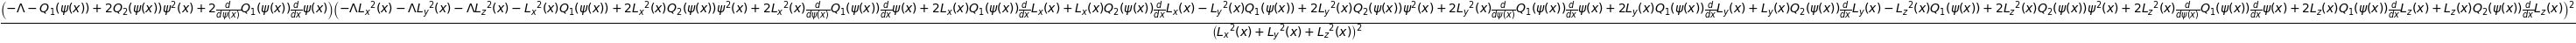

In [23]:
factor(determinant)

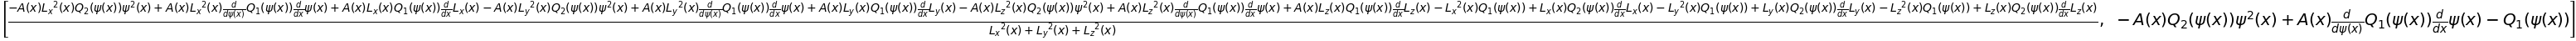

In [6]:
solve(determinant,Lambda)

## Change of variables: 
### $\vec{\Lambda} \equiv I\Omega^2r^2\vec{l}$
### $ x \equiv {\rm ln}\,r$
### $ \tau \equiv \Omega t$

## Some other definitions: 
### $I \equiv \frac{1}{2\pi}\int_0^{2\pi}\int_{-\infty}^{\infty}\rho z^2 dz d\phi = \Sigma (h/r)^2r^2$ (if $\gamma = 1$) 
### $\Omega = r^{-3/2}$ (Keplerian, $G=M=1$)
### $\psi \equiv |\frac{\partial}{\partial x}\frac{\vec{\Lambda}}{\Lambda}|$
### $Q_1 = Q_1(\psi)$
### $Q_2 = Q_2(\psi)$
### $Q_3 = Q_3(\psi)$

## We want conservative form:
### $\partial_{\tau}\vec{\Lambda} + \partial_x(\vec{F}(\vec{\Lambda},\vec{\Lambda}_x)) = 0$

### (Ex: $\partial_t\rho + \partial_x(\rho v) = 0$)

## Can write fluxes in form:
### $\vec{F} = (2\frac{\partial\psi}{\partial x}\frac{\partial Q_1}{\partial \psi} - Q_1 + \frac{2Q_1}{\Lambda}\partial_x\Lambda)\vec{\Lambda} \\ + (\frac{Q_2}{\Lambda^2}\Lambda_i\partial_x\Lambda_i + 2Q_2\psi^2)\vec{\Lambda} \\ - Q_2\partial_x\vec{\Lambda} \\ - Q_3\vec{\Lambda}\times\frac{\partial}{\partial x}(\frac{\vec{\Lambda}}{\Lambda})$

## Can write fluxes in form:
### $\vec{F} = (2\frac{\partial\psi}{\partial x}\frac{\partial Q_1}{\partial \psi} - Q_1 + \frac{2Q_1}{\Lambda^2}\Lambda_i\partial_x\Lambda_i)\vec{\Lambda} \\ + (\frac{Q_2}{\Lambda^2}\Lambda_i\partial_x\Lambda_i + 2Q_2\psi^2)\vec{\Lambda} \\ - Q_2\partial_x\vec{\Lambda} \\ - Q_3\vec{\Lambda}\times\frac{\partial}{\partial x}(\frac{\vec{\Lambda}}{\Lambda})$

## Eigenvalues of each term?

### $\vec{f} = -Q_1\vec{\Lambda} \rightarrow v = -Q_1$

### $\vec{f} = \frac{1}{\Lambda^2}\Lambda_i\partial_x\Lambda_i\vec{\Lambda} \rightarrow v = \frac{1}{\Lambda^2}\Lambda_i\partial_x\Lambda_i$

## Lets do eigenvalues for each $Q_i$ term that is quasi-linear with $\vec{\Lambda}$

## $Q_1$:
### $\vec{f} = (2\frac{\partial\psi}{\partial x}\frac{\partial Q_1}{\partial \psi} - Q_1 + \frac{2Q_1}{\Lambda^2}\Lambda_i\partial_x\Lambda_i)\vec{\Lambda} \\ \rightarrow v = \left[\frac{1}{\Lambda^2}(-\Lambda_i^2Q_1 + 2\Lambda_i^2\frac{dQ_1}{d\psi}\frac{d\psi}{dx} + 2Q_1\Lambda_i\frac{d\Lambda_i}{dx}), \\ \qquad\qquad-Q_1 + 2\frac{dQ_1}{d\psi}\frac{d\psi}{dx}\right]$

## $Q_2:$ 
### $\vec{f} = (\frac{Q_2}{\Lambda^2}\Lambda_i\partial_x\Lambda_i + 2Q_2\psi^2)\vec{\Lambda} \\ \rightarrow v = \left[\frac{Q_2}{\Lambda^2}(2\Lambda_i^2\psi^2 + \Lambda_i\frac{d\Lambda_i}{dx}),\\ \qquad\qquad 2Q_2\psi^2\right]$

## $Q_1 + Q_2:$
### $\vec{f} = (2\frac{\partial\psi}{\partial x}\frac{\partial Q_1}{\partial \psi} - Q_1 + \frac{2Q_1}{\Lambda^2}\Lambda_i\partial_x\Lambda_i + \frac{Q_2}{\Lambda^2}\Lambda_i\partial_x\Lambda_i + 2Q_2\psi^2)\vec{\Lambda} \\ \rightarrow v = \left[\frac{1}{\Lambda^2}\left(\Lambda_i^2(-Q_1 + 2Q_2\psi^2 + 2\frac{\partial Q_1}{\partial \psi}\frac{\partial \psi}{\partial x}) + \Lambda_i\frac{\partial \Lambda_i}{\partial x}(2Q_1 + Q_2)\right),\\ \qquad\qquad -Q_1 + 2\frac{dQ_1}{d\psi}\frac{d\psi}{dx} + 2Q_2\psi^2\right]$